<a href="https://colab.research.google.com/github/Siva784/ML_pro1/blob/master/ML_PRO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT TITLE** : Marketing Campaign for Banking Products.

**Data Description**:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Attribute Information**:

● **ID**: Customer ID

● **Age**: Customer's age in completed years

● **Experience**: #years of professional experience

● **Income**: Annual income of the customer ($000)

● **ZIP Code**: Home Address ZIP code.

● **Family**: Family size of the customer

● **CCAvg**: Avg. spending on credit cards per month ($000)

● **Education**: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional

● **Mortgage**: Value of house mortgage if any. ($000)

● **Personal Loan**: Did this customer accept the personal loan offered in the last campaign?

● **Securities Account**: Does the customer have a securities account with the bank?

● **CD Account**: Does the customer have a certificate of deposit (CD) account with
the bank?

● **Online**: Does the customer use internet banking facilities?

● **Credit card**: Does the customer use a credit card issued by the bank?

**Objective**:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.

 **Step 1** : Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("Bank1.xlsx")  #Reading the dataset
df.head(5)  #Getting the First Five Rows From the Dataset


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail() #last 5 rows from the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.shape  #Prints The Shape Of Our Dataset

(5000, 14)

In [ ]:
df.info()  #info() Gives the Information about Non Null values and DataTypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   PersonalLoan        5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().transpose()    #describe() is used to view some basic statistical details like percentile, mean, std etc.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Step 2** : Check if you need to clean the data for any of the variables

Checking if any Unusual data respective to their Column name

In [ ]:
df.loc[df.ID < 0, 'ID'] 

Series([], Name: ID, dtype: int64)

In [ ]:
df.loc[df.Age < 0, 'Age'] 

Series([], Name: Age, dtype: int64)

In [ ]:
df.loc[df.Experience < 0, 'Experience'] 

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: Experience, dtype: int64

In [ ]:
df.loc[df.Income < 0, 'Income'] 

Series([], Name: Income, dtype: int64)

In [ ]:
df.loc[df.Family < 0, 'Family']

Series([], Name: Family, dtype: int64)

In [ ]:
df.loc[df.CCAvg < 0, 'CCAvg']

Series([], Name: CCAvg, dtype: float64)

In [ ]:
df.loc[df.Education < 0, 'Education']

Series([], Name: Education, dtype: int64)

In [ ]:
df.loc[df.Mortgage < 0, 'Mortgage'] 

Series([], Name: Mortgage, dtype: int64)

In [ ]:
df.loc[df.PersonalLoan < 0, 'PersonalLoan'] 

Series([], Name: PersonalLoan, dtype: int64)

In [ ]:
df.loc[df['Securities Account'] < 0, 'Securities Account'] 

Series([], Name: Securities Account, dtype: int64)

In [ ]:
df.loc[df['CD Account'] < 0, 'CD Account']

Series([], Name: CD Account, dtype: int64)

In [ ]:
df.loc[df['Online'] < 0, 'Online']

Series([], Name: Online, dtype: int64)

In [ ]:
df.loc[df['CreditCard'] < 0, 'CreditCard']

Series([], Name: CreditCard, dtype: int64)

In [ ]:
df.loc[df.Experience < 0, 'Experience']=df['Experience'].median()    #Experience Should not be negative,so setting negative values to 0
df['Experience'].median()

20.0

Finding Correlation b/w the variables

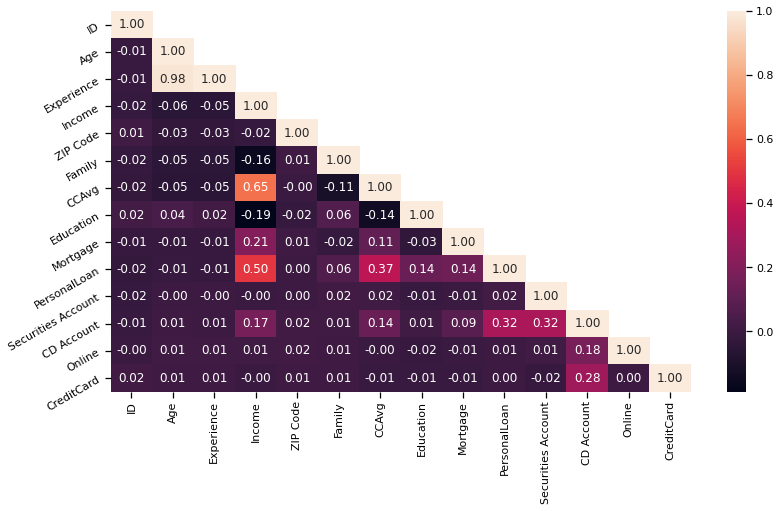

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observation**: From the above heatmap ,the correlation between the Age and Experience is high( 0.98 ) because highly correlated columns effect in model accuracy.so we remove the column from the observation.
And the ID and ZipCode also doesn't make a sense in getting the Personal Loan.
so Removing ID and ZipCode will help us to improve accuracy.



In [ ]:
df=df.drop(['ID','Experience','ZIP Code'],axis=1)
df

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**Step 3** :EDA: Study the data distribution in each attribute and target variable, share your
findings.


Number of unique in each column?

In [ ]:
for i in list(df.columns):
  print(i,end="\n")
  print("Length : ",len(df[i].unique()))
  print(df[i].unique(),end="\n\n")
  

Age
Length :  45
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Income
Length :  162
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

Family
Length :  4
[4 3 1 2]

CCAvg
Length :  108
[ 1.6         1.5         1.          2.7         0.4         0.3
  0.6         8.9         2.4         0.1       

Number of people with zero mortgage?

In [ ]:
df.loc[df.Mortgage ==0,'Mortgage'].count()

3462

Number of people with zero credit card spending per month?

In [ ]:
df.loc[df.CCAvg ==0,'CCAvg'].count()

106

In [ ]:
df.apply(pd.Series.value_counts)

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0.0,NaN,NaN,NaN,106.0,NaN,3462.0,4520.0,4478.0,4698.0,2016.0,3530.0
0.1,NaN,NaN,NaN,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
590.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
601.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
612.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
617.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


**Univariate Analysis**:In univariate analysis, each variable is analysed individually and we don’t look at more than one variable at a time. It is the simplest and basic form of analysis.

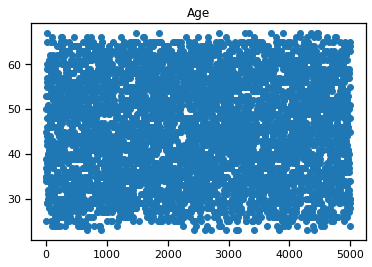

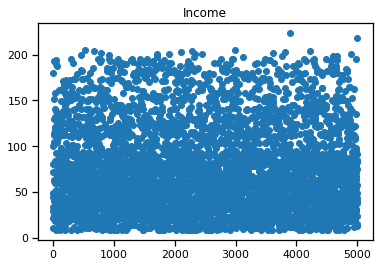

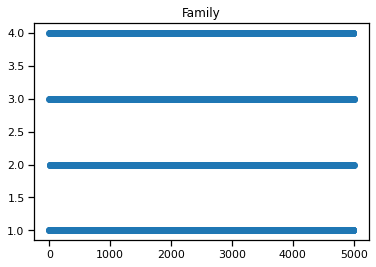

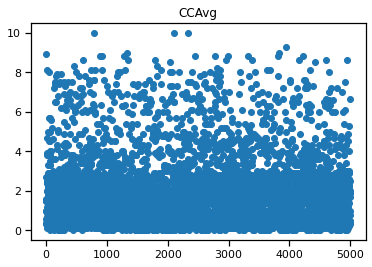

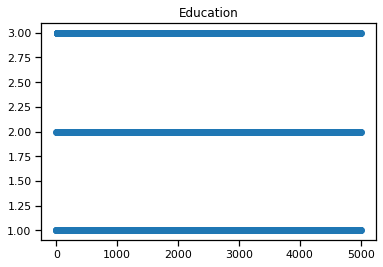

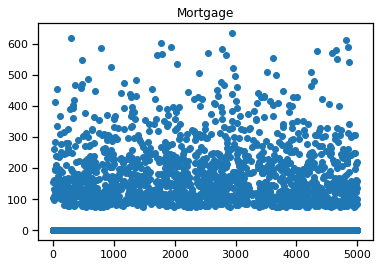

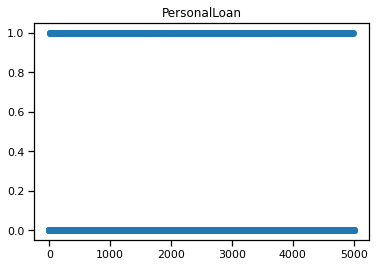

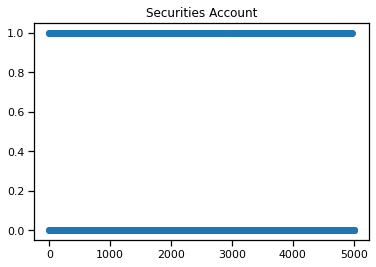

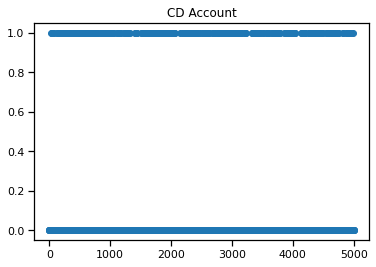

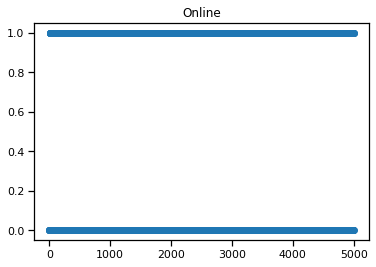

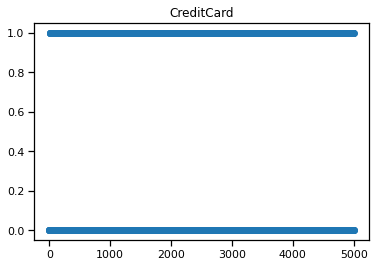

In [ ]:
#scatter Plot for variables in training dataset

for col in df.columns:
  plt.scatter(df.index,df[col])
  plt.title(col)
  plt.show()

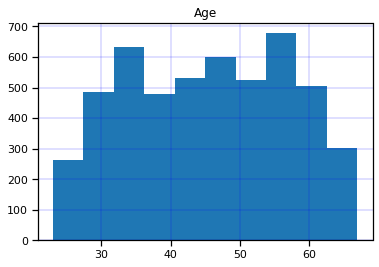

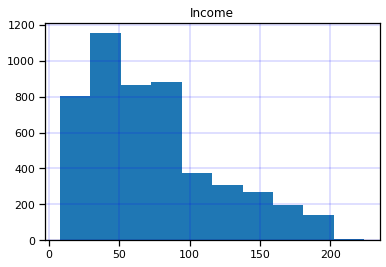

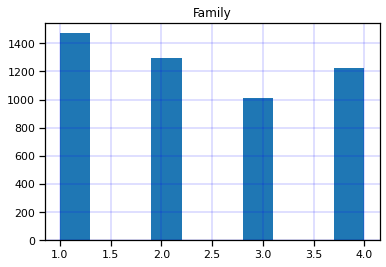

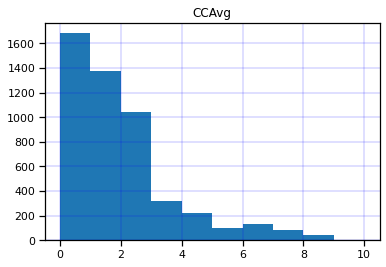

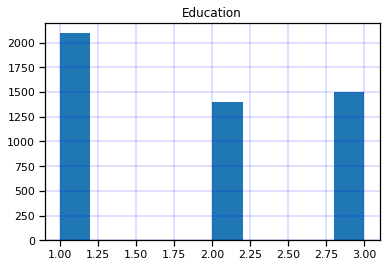

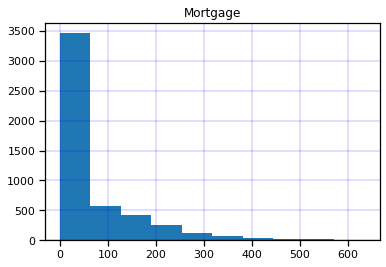

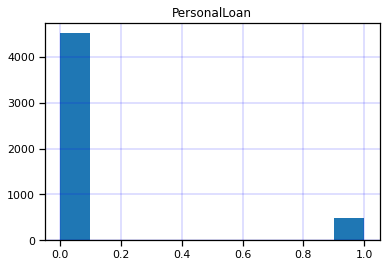

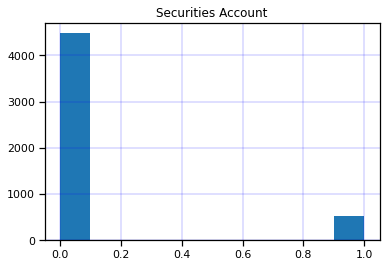

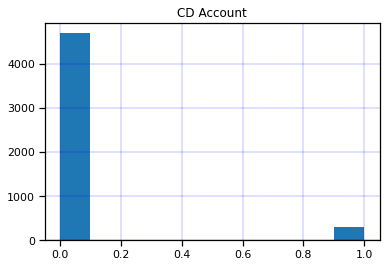

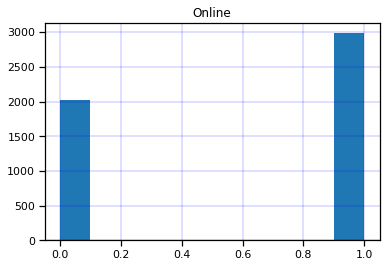

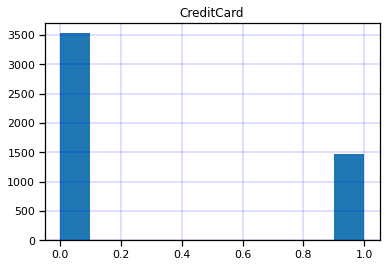

In [ ]:
#histogram for variable in dataset
for i in df.columns:
  plt.hist(df[i])
  plt.title(i)
  plt.grid(color='b',lw = 0.25)
  plt.show()

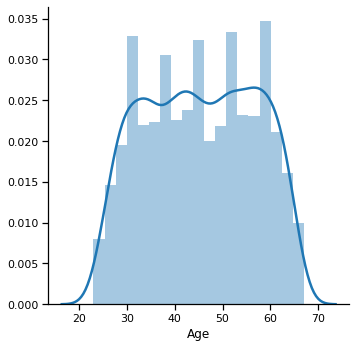

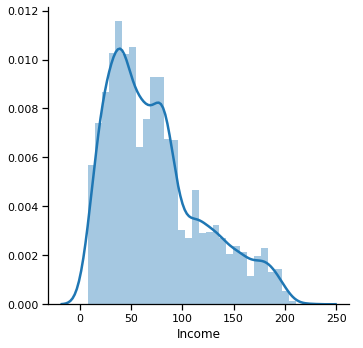

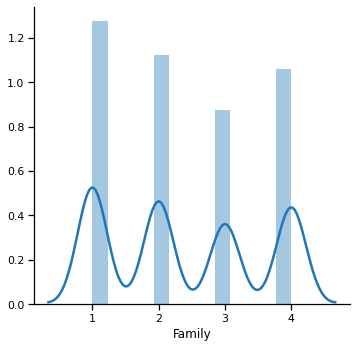

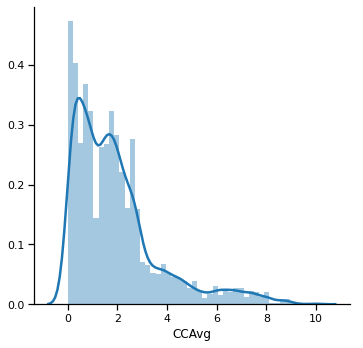

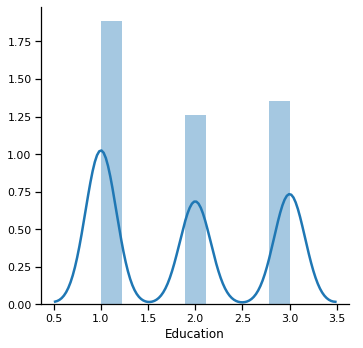

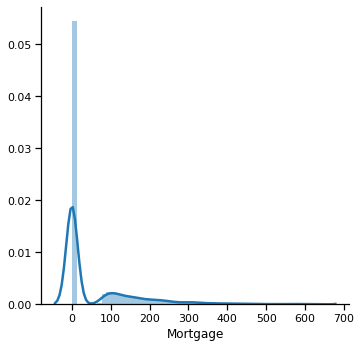

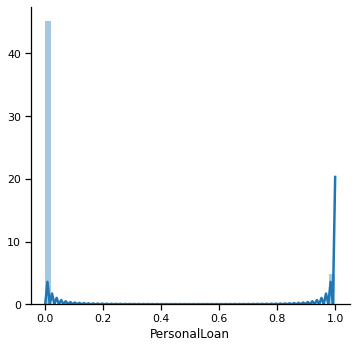

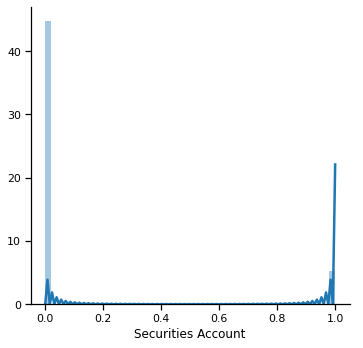

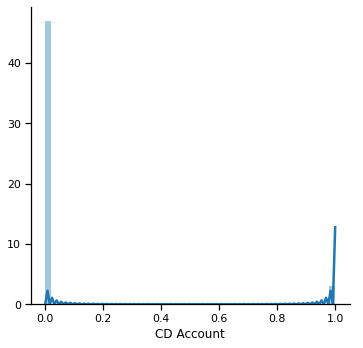

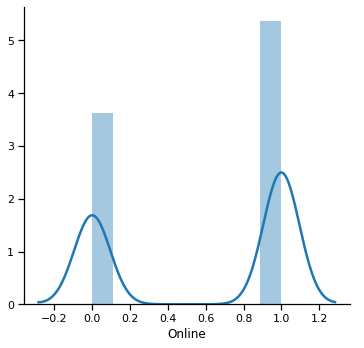

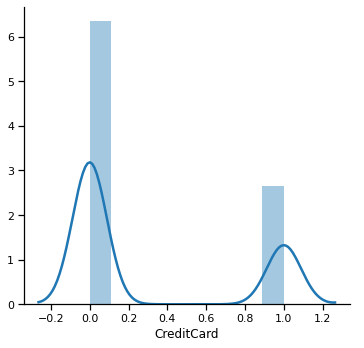

In [ ]:
#distribution plot
for col1 in df.columns:
  sns.FacetGrid(df,height=5).map(sns.distplot,col1).add_legend()

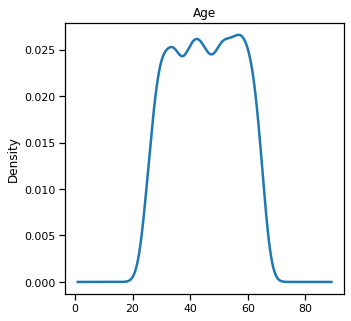

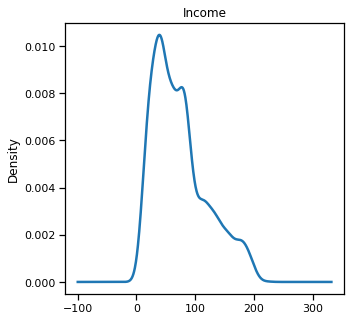

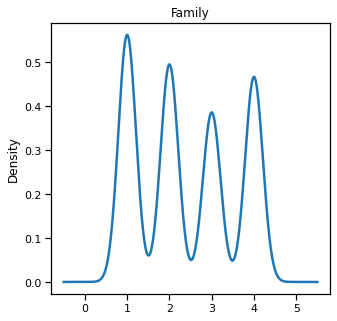

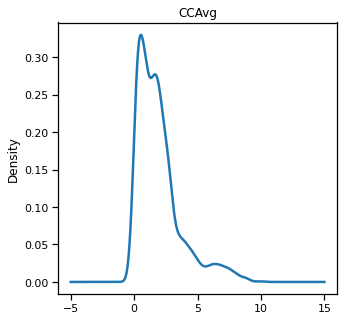

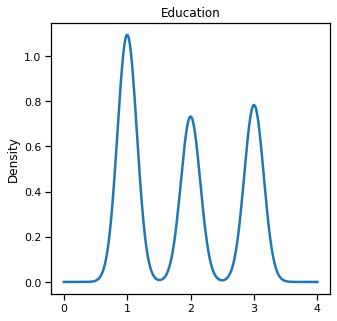

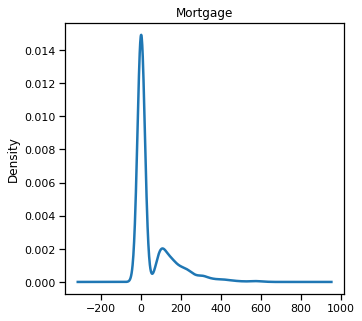

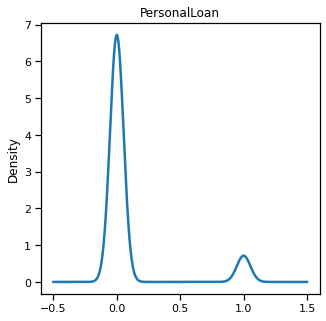

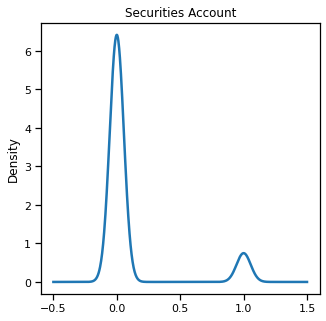

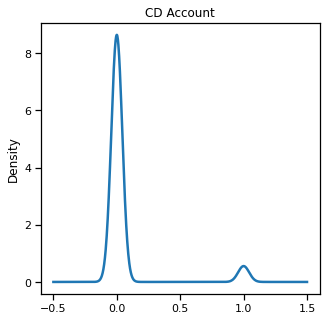

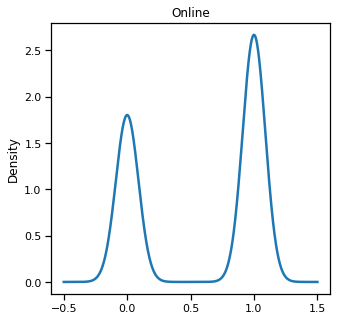

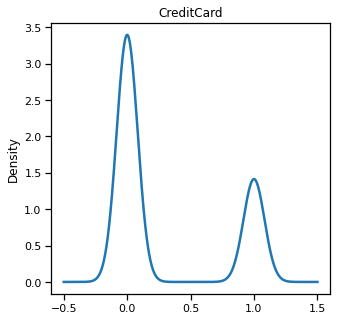

In [ ]:
#Density Plot
for k in df.columns:
  plt.figure(figsize=(5,5))
  df[k].plot(kind="density")
  plt.title(k)
  plt.show()

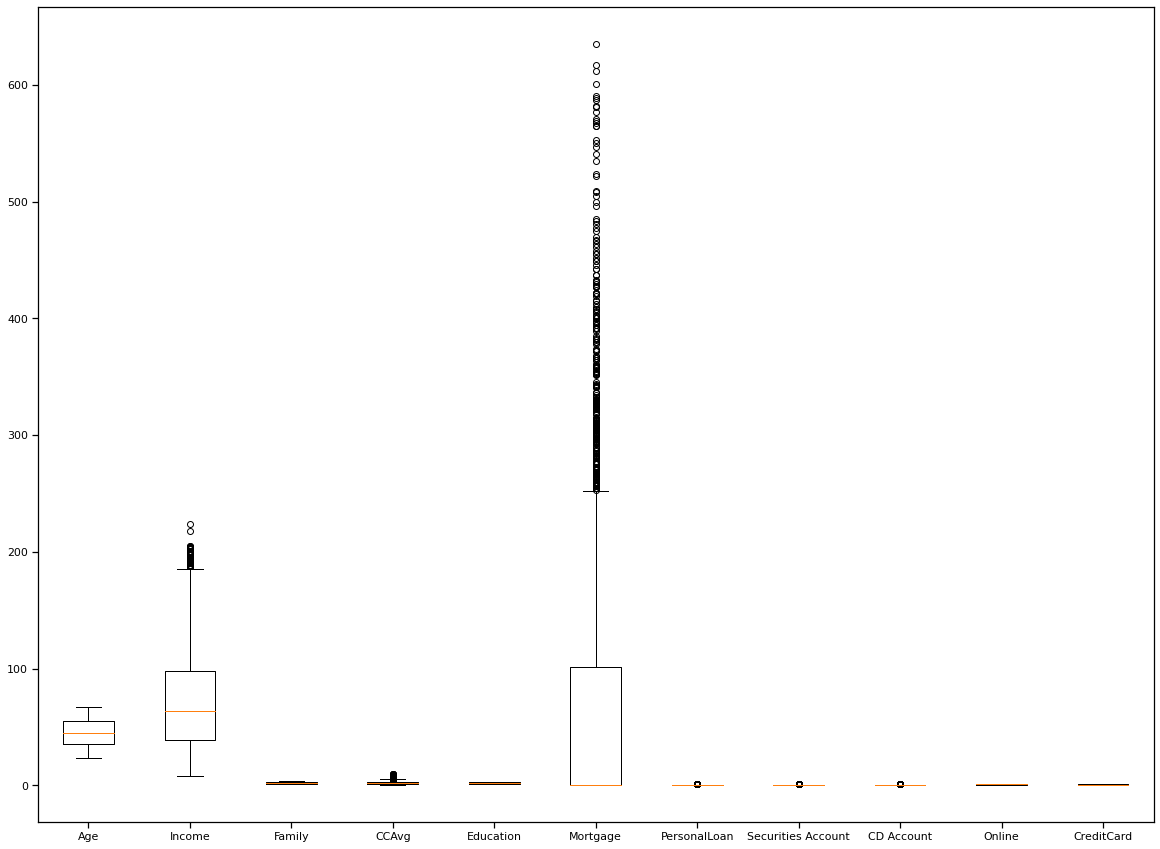

In [ ]:
# Box Plot for variable of training data set

plt.figure(figsize=(20,15))
plt.boxplot(df.values,labels=df.columns)
plt.show()

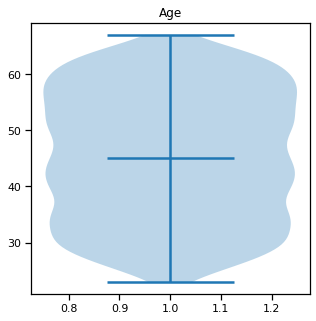

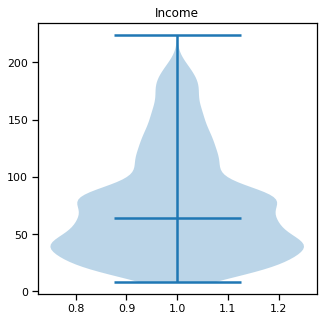

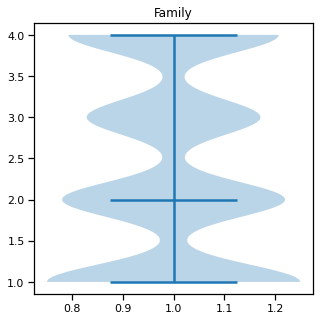

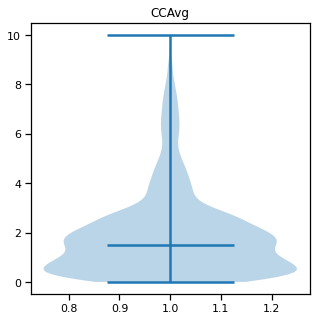

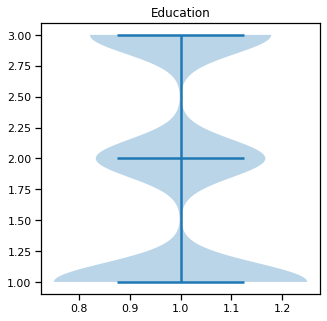

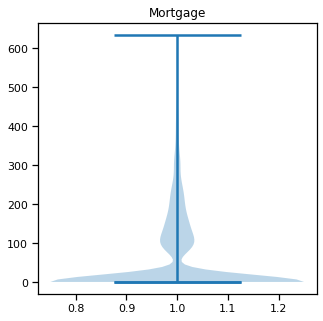

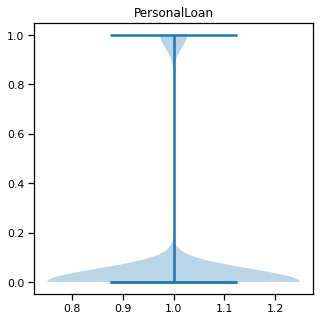

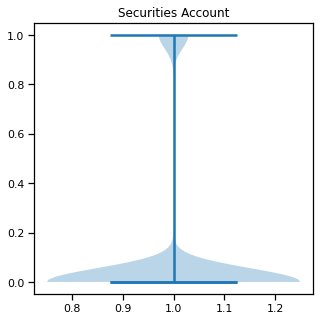

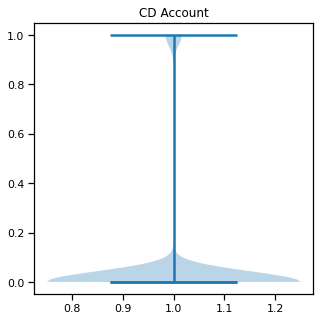

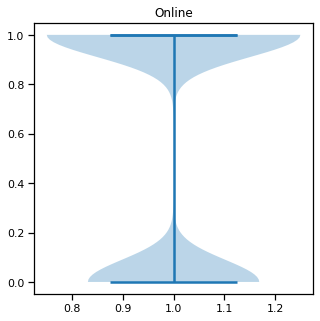

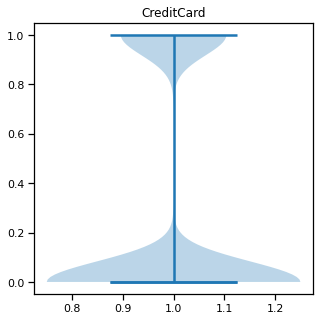

In [ ]:
#violin Plot
for i in df.columns:
  plt.figure(figsize=(5,5))
  plt.violinplot(df[i],showmedians=True)
  plt.title(i)
  plt.show()

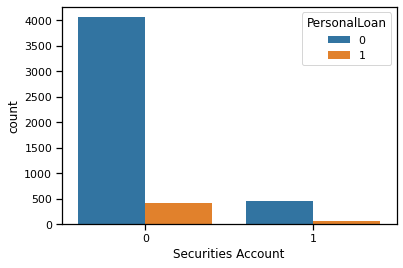

In [ ]:
sns.countplot(x="Securities Account", data=df,hue="PersonalLoan")

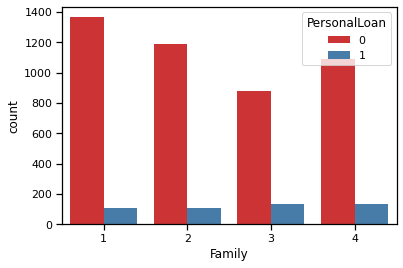

In [ ]:
sns.countplot(x='Family',data=df,hue='PersonalLoan',palette='Set1')

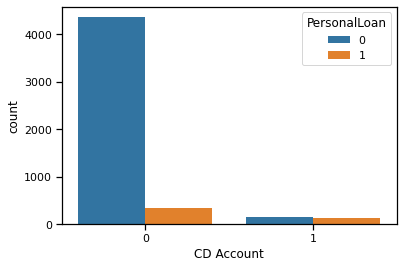

In [ ]:
sns.countplot(x='CD Account',data=df,hue='PersonalLoan')

**Bivariate Analysis** 

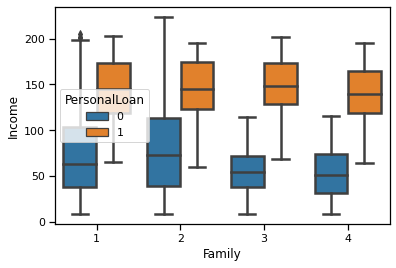

In [ ]:
sns.boxplot(x=df.Family,y=df.Income,hue=df.PersonalLoan)

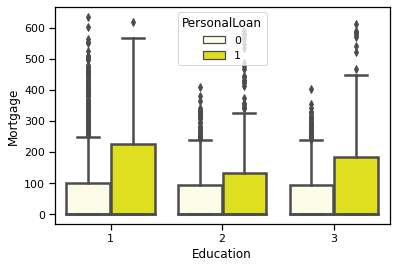

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=df,color='yellow')

***Observation*** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

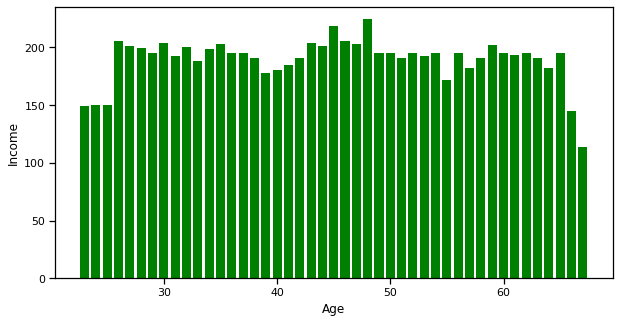

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(df['Age'],df['Income'],color="green")
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

From above plot Income and Age not as much correlated

Text(0.5, 0, 'Age')

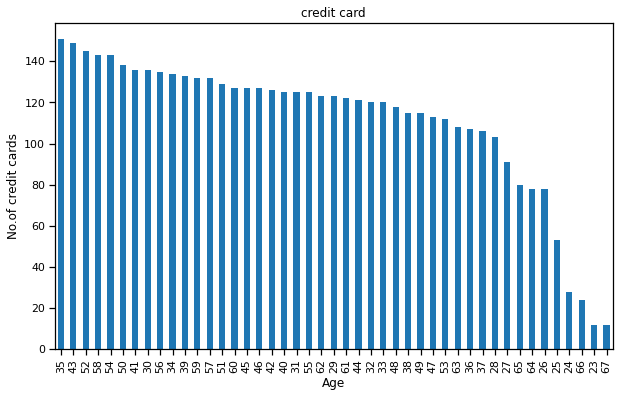

In [ ]:
df['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title("credit card")
plt.ylabel('No.of credit cards')
plt.xlabel('Age')

**Observation**

Above plot shows the relation between "Age" and how many people of that Age group uses "Credit Cards"

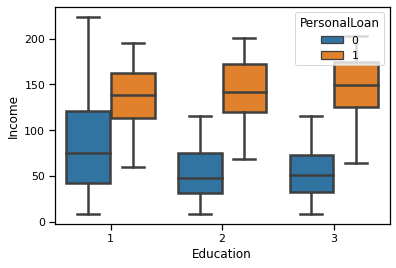

In [ ]:
#Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=df)

***Observation*** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

**Multivariate Analysis:**

**Pair plot:** 

pair plot shows a clear and nice view of all variables and their realtion ship with all other variables.

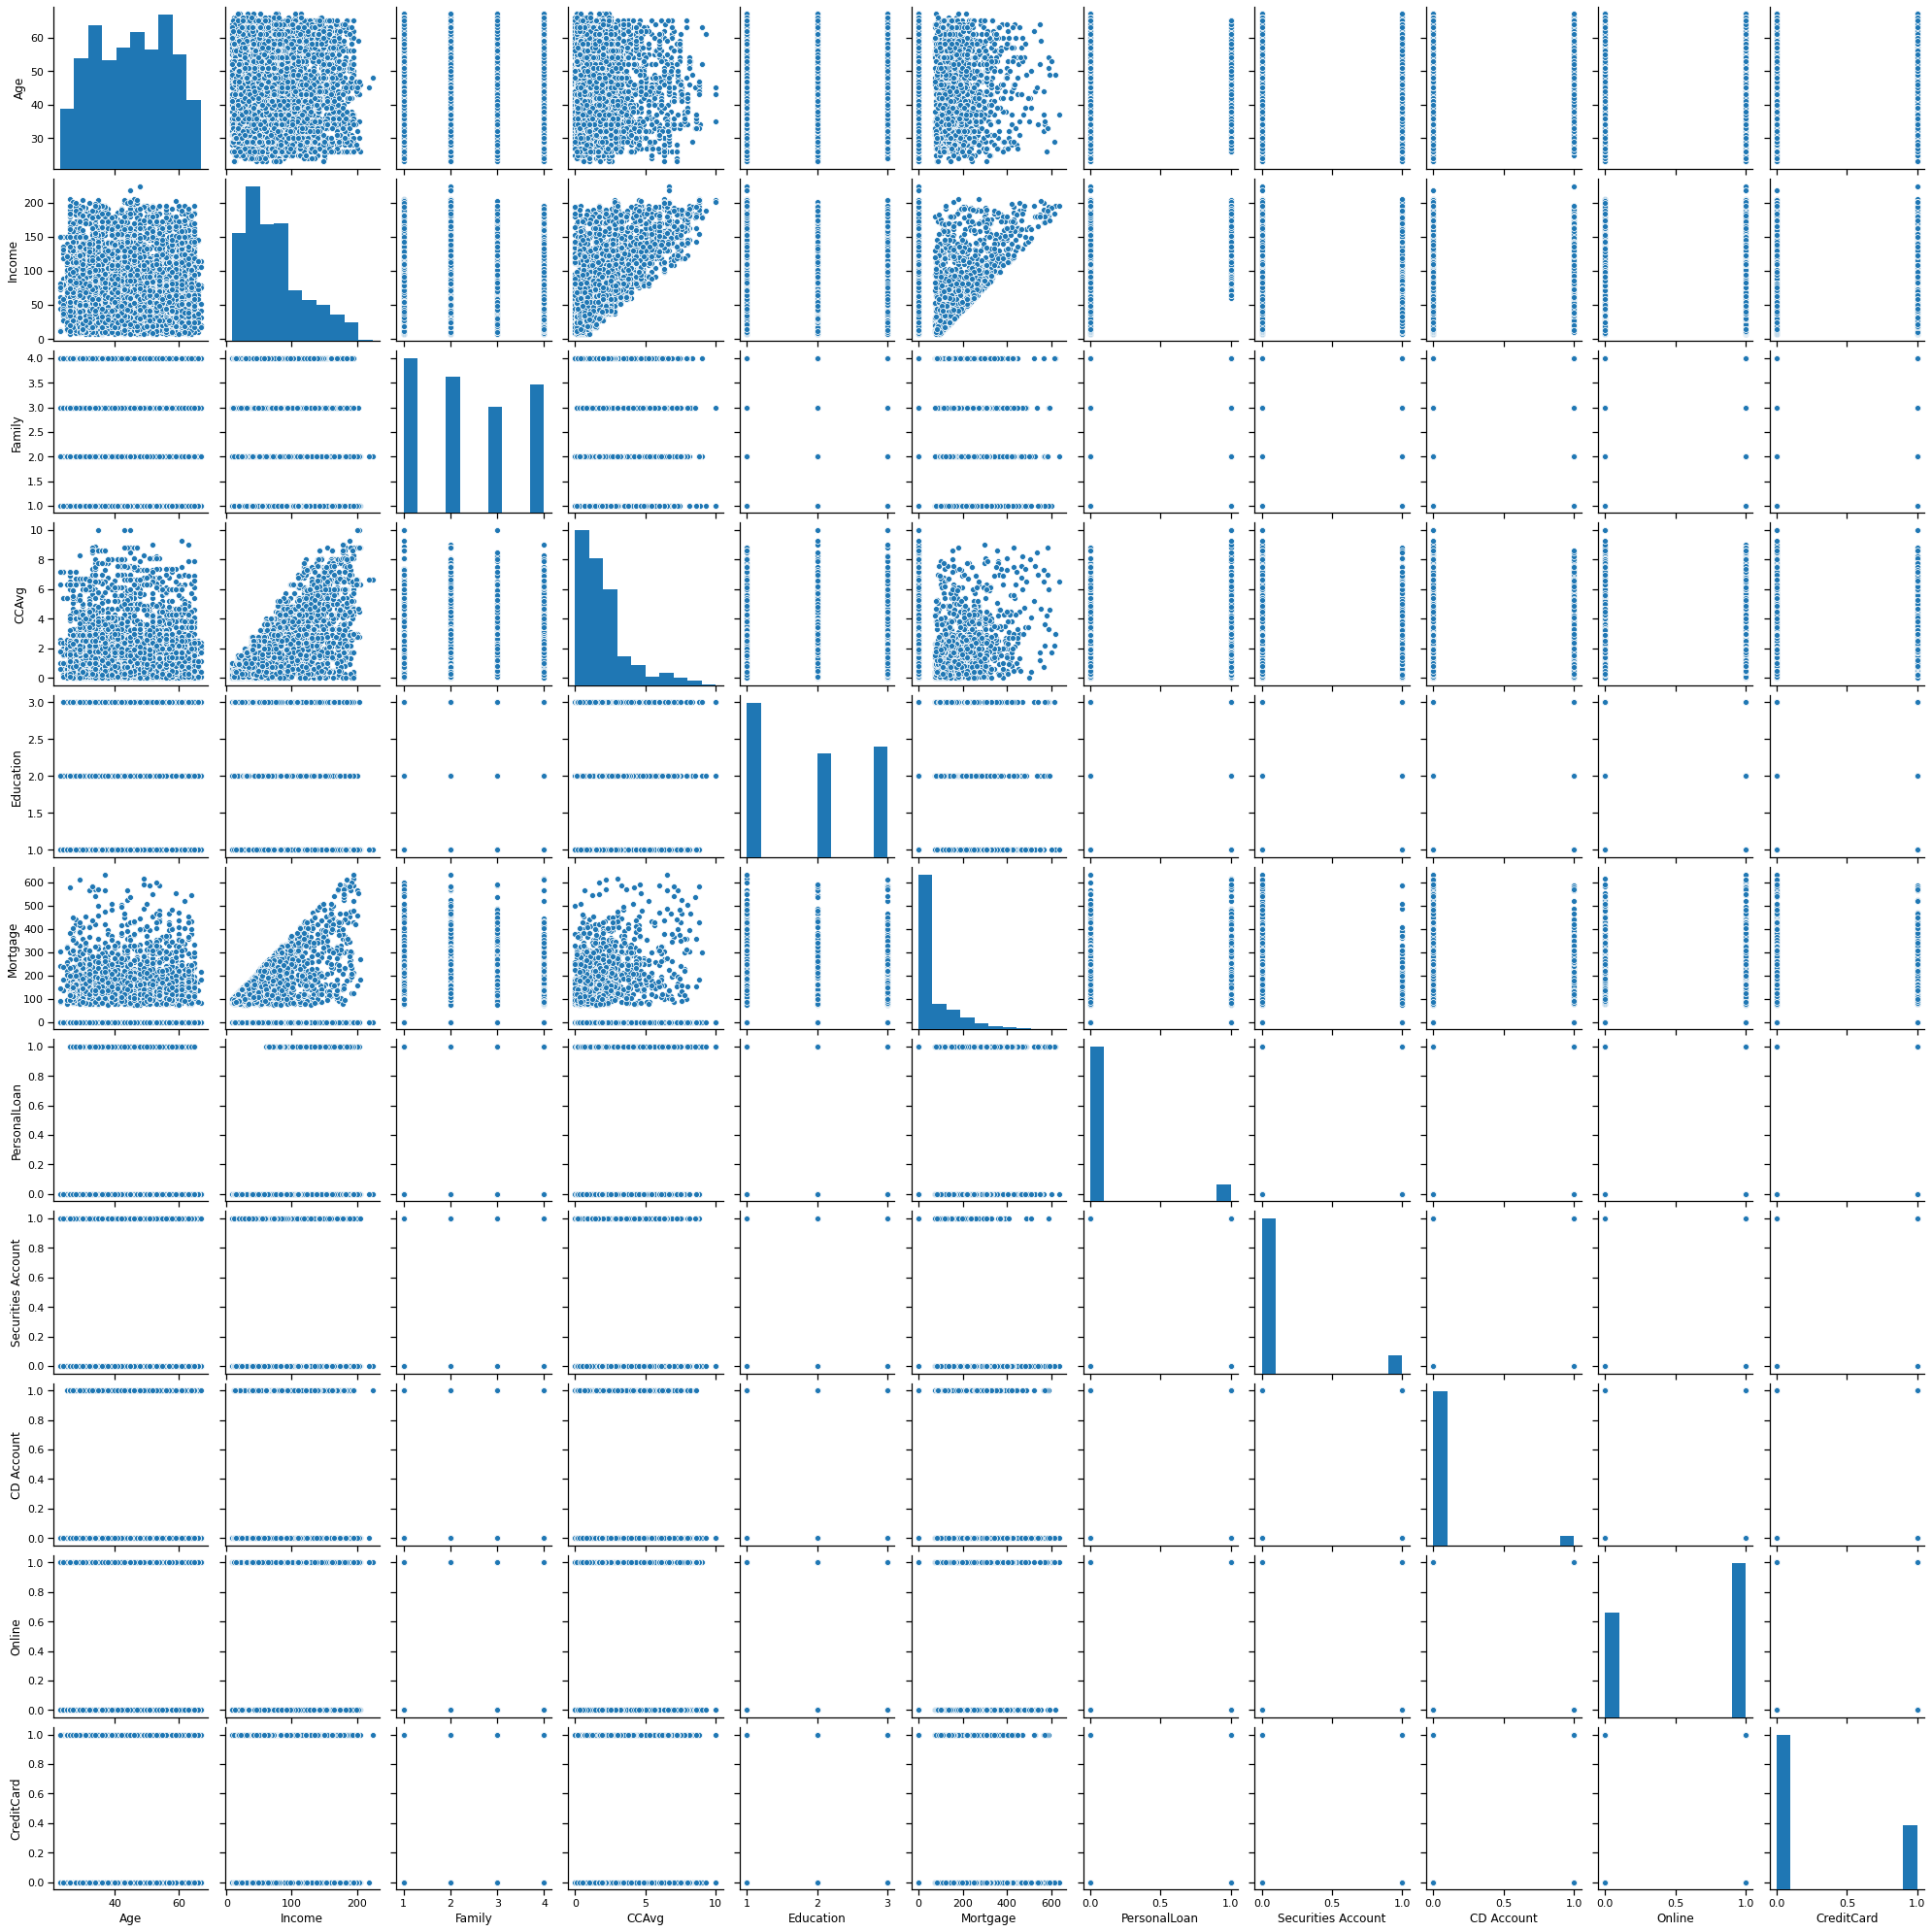

In [ ]:
sns.pairplot(df)

***Observation***:

1.Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.

2.Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

3.CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

4.Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

5.The variables family and education are ordinal variables. The distribution of families is evenly distributes.

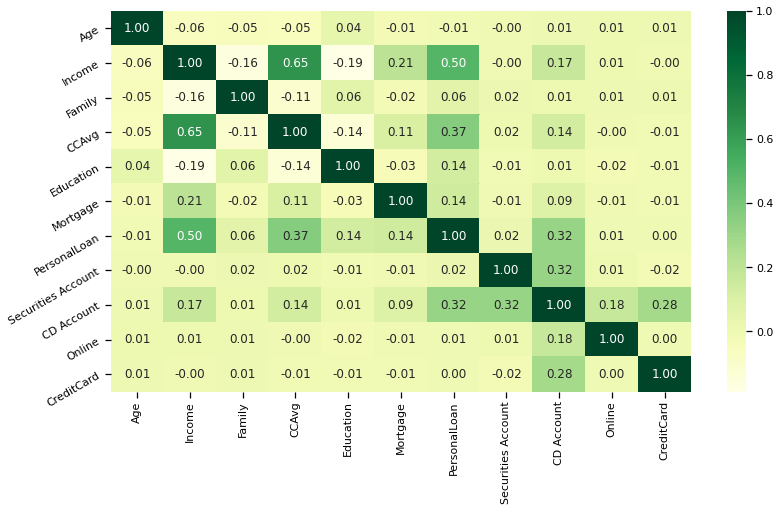

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,cmap="YlGn", annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# **4 Feature Transformations**

From our observations from univariate analysis we observe that **Income** and **CCAvg** are positively skewed so we are applying Power Transformations to decrease their Skewness  

In [ ]:
#Taking our feature variables by dropping our target variable personal loan from the data
data_x=df.drop('PersonalLoan',axis=1)
data_y=df["PersonalLoan"]


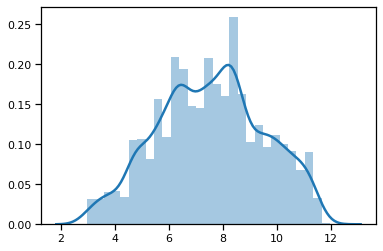

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_x['Income'].values.reshape(-1,1))
temp=pt.transform(data_x['Income'].values.reshape(-1,1))
sns.distplot(temp)

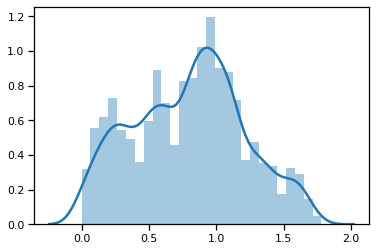

In [ ]:
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_x['CCAvg'].values.reshape(-1,1))
temp=pt.transform(data_x['CCAvg'].values.reshape(-1,1))
sns.distplot(temp)

**Observation** After performing Power Transformation we can observe that both Income and CCAvg are become normal

**Mortgage** is also skewed but we observe that most of the values are zeroes and remainig values are less so here we use bining to change labels 

In [ ]:
data_x['Mortgage_Int']=pd.cut(data_x['Mortgage'],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
data_x.drop('Mortgage',axis=1,inplace=True)
data_x.head()


,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


In [ ]:
x=data_x.values
y=data_y.values #our target variable

**Standard Scaling**

In [ ]:
#Scaling our data for easy to fit model and for better prediction
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

x=sc_x.fit_transform(x)

x

array([[-1.77441684, -0.53822878,  1.39741398, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [-0.02952359, -0.8641094 ,  0.52599094, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [-0.55299157, -1.36379301, -1.21685513, ..., -1.21661774,
        -0.64531434, -0.47897149],
       ...,
       [ 1.54088033, -1.08136314, -0.34543209, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [ 1.71536965, -0.53822878,  0.52599094, ...,  0.82195086,
        -0.64531434, -0.47897149],
       [-1.51268285,  0.20043396,  0.52599094, ...,  0.82195086,
         1.54963239, -0.47897149]])

# 5 . Splitting data to train and test in 70:30 ratio by stratify method


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=50)
x_train,x_test,y_train,y_test

(array([[-0.29125758, -0.84238402,  0.52599094, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.366391  , -0.12544666,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.01741235, -0.12544666, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [-0.90197022, -1.08136314,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [-0.02952359, -0.6903064 , -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [ 0.93016769, -0.99446164, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149]]),
 array([[ 1.62812499, -0.97273627,  0.52599094, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [-0.72748089, -0.7772079 , -1.21685513, ..., -1.21661774,
          1.54963239,  0.68527618],
        [ 1.27914634, -0.73375715, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [ 0.58118904, -0.71203177,  0.52599094, ..., -

#6 . Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

#7 .Evaluating Model Performance

**Confusion Matrix**

describes the complete performance of the model

array([[1331,   25],
       [  71,   73]])

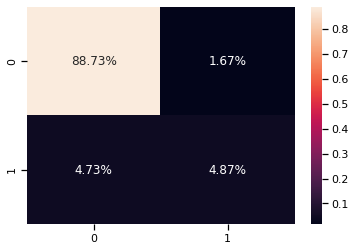

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm

**Accuracy Score**

Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_predict)
tac=accuracy_score(y_train, classifier.predict(x_train))
print("test accuracy:",ac)
print("train accuracy:",tac)

test accuracy: 0.936
train accuracy: 0.9554285714285714


**Observation**

From above we can observe that our model performs 93% and 95% accurately
on our test and train data respectively

**Precision**

It is the number of correct positive results divided by the number of positive results predicted by the classifier.

In [ ]:
from sklearn.metrics import precision_score
p=precision_score(y_test,y_predict)
p

0.7448979591836735

**Recall**

It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

In [ ]:
from sklearn.metrics import recall_score
rc=recall_score(y_test,y_predict)
rc

0.5069444444444444

**f1_score**

F1 Score is used to measure a test’s accuracy

F1 Score is the Harmonic Mean between precision and recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_predict)
f1

0.6033057851239669

**Roc Auc Score**

AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes

In [ ]:
from sklearn.metrics import roc_auc_score
ras=roc_auc_score(y_test,y_predict)
ras


0.7442539331366765

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1356
           1       0.74      0.51      0.60       144

    accuracy                           0.94      1500
   macro avg       0.85      0.74      0.78      1500
weighted avg       0.93      0.94      0.93      1500



In [ ]:
eval=[tac,ac,p,rc,f1,ras]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.955429
test_accuracy_score     0.936000
precession              0.744898
Recall                  0.506944
F1_score                0.603306
Roc Auc Score           0.744254
Name: Evaluation Results, dtype: float64

# 8 Implementing various Algorithms on this dataset

**8.1 Descision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=2)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [ ]:
y_predict=tree_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

**Evaluating model Performance**

array([[1353,    3],
       [  22,  122]])

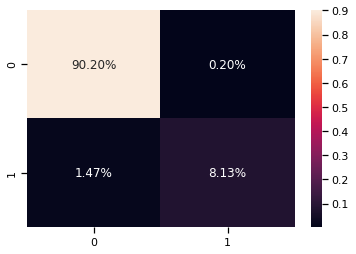

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac1=accuracy_score(y_train, tree_classifier.predict(x_train))
acs=accuracy_score(y_test,y_predict)
print("train_Accuracy",tac1)
print("test_Accuracy",acs)

train_Accuracy 0.988
test_Accuracy 0.9833333333333333


**Observation**

From above we can observe that our model performs 97.5% and 98.1% accurately
on our test and train data respectively

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
ps=precision_score(y_test,y_predict) #Precision
rs=recall_score(y_test,y_predict) #Recall
f1s=f1_score(y_test,y_predict) #f1Score

ras1=roc_auc_score(y_test,y_predict) #roc_auc_score



In [ ]:
eval=[tac1,acs,ps,rs,f1s,ras1]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.988000
test_accuracy_score     0.983333
precession              0.949580
Recall                  0.784722
F1_score                0.859316
Roc Auc Score           0.890149
Name: Evaluation Results, dtype: float64

**8.2 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=5, random_state=2)
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
y_predict=randomforest_model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

Evaluating model performance

array([[1356,    0],
       [  42,  102]])

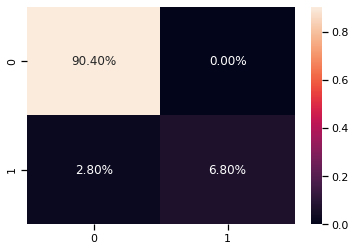

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac2=accuracy_score(y_train, randomforest_model.predict(x_train))
acs1=accuracy_score(y_test,y_predict)
print('train_accuracy',tac2)
print("test_Accuracy",acs1)

train_accuracy 0.9868571428571429
test_Accuracy 0.972


**Observation**

From above we can observe that our model performs 92.7% and 93.4% accurately
on our test and train data respectively

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
ps1=precision_score(y_test,y_predict) #Precision
rs1=recall_score(y_test,y_predict) #Recall
f1s1=f1_score(y_test,y_predict) #f1Score
ras2=roc_auc_score(y_test,y_predict) #roc_auc_score



In [ ]:
eval=[tac2,acs1,ps1,rs1,f1s1,ras2]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.986857
test_accuracy_score     0.972000
precession              1.000000
Recall                  0.243056
F1_score                0.391061
Roc Auc Score           0.621528
Name: Evaluation Results, dtype: float64

**8.3 Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict=bayes_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

Evaluating model Performance

array([[1248,  108],
       [  62,   82]])

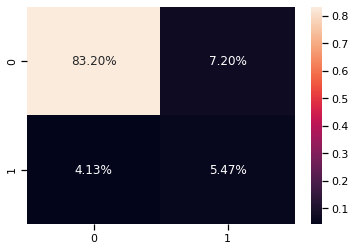

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm

In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac3=accuracy_score(y_train, bayes_classifier.predict(x_train))
acs2=accuracy_score(y_test,y_predict)
print("train_accuracy",tac3)
print("test_Accuracy",acs2)

train_accuracy 0.8845714285714286
test_Accuracy 0.8866666666666667


**Observation**

From above we can observe that our model performs 88.4% and 88.6% accurately
on our test and train data respectively

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
ps2=precision_score(y_test,y_predict) #Precision
rs2=recall_score(y_test,y_predict) #Recall
f1s2=f1_score(y_test,y_predict) #f1Score

ras3=roc_auc_score(y_test,y_predict) #roc_auc_score



In [ ]:
eval=[tac3,acs2,ps2,rs2,f1s2,ras3]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.884571
test_accuracy_score     0.886667
precession              0.431579
Recall                  0.569444
F1_score                0.491018
Roc Auc Score           0.744899
Name: Evaluation Results, dtype: float64

**8.4 K-Nearest Neighbour (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_predict=knn_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

Evaluating model Performance

array([[1351,    5],
       [  61,   83]])

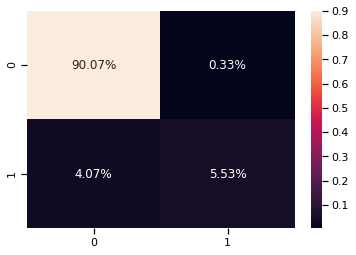

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm


In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac4=accuracy_score(y_train, knn_classifier.predict(x_train))
acs3=accuracy_score(y_test,y_predict)
print("train_accuracy",tac4)
print("test_Accuracy",acs3)

train_accuracy 0.9811428571428571
test_Accuracy 0.956


**Observation**

From above we can observe that our model performs 95.6% and 98.1% accurately
on our test and train data respectively

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
ps3=precision_score(y_test,y_predict) #Precision
rs3=recall_score(y_test,y_predict) #Recall
f1s3=f1_score(y_test,y_predict) #f1Score
ras4=roc_auc_score(y_test,y_predict) #roc_auc_score




In [ ]:
eval=[tac4,acs3,ps3,rs3,f1s3,ras4]
df=pd.Series(eval,index=['train_accuracy','test_accuracy_score','precession','Recall','F1_score','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy         0.981143
test_accuracy_score    0.956000
precession             0.943182
Recall                 0.576389
F1_score               0.715517
Roc Auc Score          0.786351
Name: Evaluation Results, dtype: float64

**8.5 Support Vector Machine**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
svm_classifier = SVC(kernel='linear', random_state=0)  
svm_classifier.fit(x_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_predict=svm_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

Evaluating model Performance

array([[1338,   18],
       [  76,   68]])

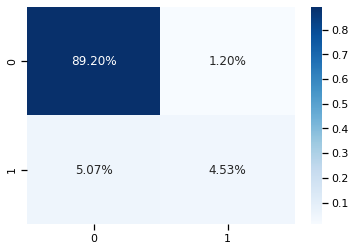

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm


In [ ]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac5=accuracy_score(y_train, svm_classifier.predict(x_train))
acs4=accuracy_score(y_test,y_predict)
print('train_accuracy',tac5)
print("test_Accuracy",acs4)

train_accuracy 0.9591428571428572
test_Accuracy 0.9373333333333334


**Observation**

From above we can observe that our model performs 93.7% and 95.9% accurately
on our test and train data respectively

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
ps4=precision_score(y_test,y_predict) #Precision
rs4=recall_score(y_test,y_predict) #Recall
f1s4=f1_score(y_test,y_predict) #f1Score
ras5=roc_auc_score(y_test,y_predict) #roc_auc_score



In [ ]:
eval=[tac5,acs4,ps4,rs4,f1s4,ras5]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.959143
test_accuracy_score     0.937333
precession              0.790698
Recall                  0.472222
F1_score                0.591304
Roc Auc Score           0.729474
Name: Evaluation Results, dtype: float64

**8.6 Gradient Boosting**

Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 55

In [ ]:

model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(x_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=55,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

from sklearn.metrics import accuracy_score
tac7=accuracy_score(y_train, model.predict(x_train))#train accuracy
acs5=accuracy_score(y_test,y_predict) #test accuracy
tac7,acs5

(0.9908571428571429, 0.98)

In [ ]:
tac8=model.score(x_train,y_train) 
print("train_accuracy",tac7)
print("test_accuracy",acs5)

train_accuracy 0.9908571428571429
test_accuracy 0.98


there is no much difference in tran and test accuracy so we can say that our model is well fitted

array([[1353,    3],
       [  27,  117]])

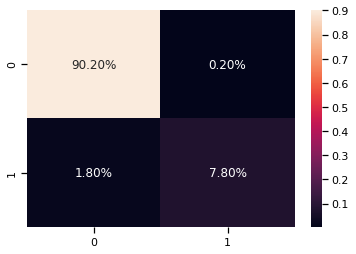

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
ps5=precision_score(y_test,y_predict) #Precision
rs5=recall_score(y_test,y_predict) #Recall
f1s5=f1_score(y_test,y_predict) #f1Score
ras6=roc_auc_score(y_test,y_predict) #roc_auc_score



In [ ]:
eval=[tac7,acs5,ps5,rs5,f1s5,ras6]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.990857
test_accuracy_score     0.980000
precession              0.975000
Recall                  0.812500
F1_score                0.886364
Roc Auc Score           0.905144
Name: Evaluation Results, dtype: float64

**Making lists for performance analysis**

In [ ]:
accuracy=[ac,acs,acs1,acs2,acs3,acs4,acs5]
f1score=[f1,f1s,f1s1,f1s2,f1s3,f1s4,f1s5]
recal=[rc,rs,rs1,rs2,rs3,rs4,rs5]
print("f1_score:",f1score)
print('recall:',recal)
print('Accuracy:',accuracy)
#We are generating list of accuracy of all the models

f1_score: [0.6033057851239669, 0.8593155893536122, 0.39106145251396646, 0.49101796407185627, 0.7155172413793103, 0.591304347826087, 0.8863636363636362]
recall: [0.5069444444444444, 0.7847222222222222, 0.24305555555555555, 0.5694444444444444, 0.5763888888888888, 0.4722222222222222, 0.8125]
Accuracy: [0.936, 0.9833333333333333, 0.972, 0.8866666666666667, 0.956, 0.9373333333333334, 0.98]


#Comparing Algoritms using their Accuracy F1_score and Recall

In [ ]:
dt=np.array([accuracy,f1score,recal])
df=pd.DataFrame(dt,columns=['Logistic Regression','Decision Tree','Random Forest','Naive bayes','KNN-CLASSIFIER','Suport Vector Machine',"boosting"],index=['accuracy','f1_score','recall'])
df

,Logistic Regression,Decision Tree,Random Forest,Naive bayes,KNN-CLASSIFIER,Suport Vector Machine,boosting
accuracy,0.936000,0.983333,0.972000,0.886667,0.956000,0.937333,0.980000
f1_score,0.603306,0.859316,0.391061,0.491018,0.715517,0.591304,0.886364
recall,0.506944,0.784722,0.243056,0.569444,0.576389,0.472222,0.812500


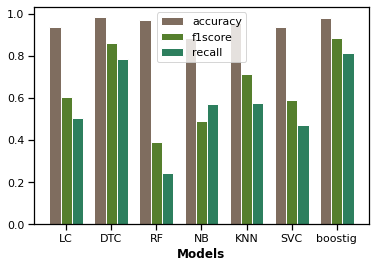

In [ ]:
barWidth = 0.25
models=['LC','DTC','RF','NB','KNN','SVC','boostig']
r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1,accuracy, color='#7f6d5f', width=barWidth, edgecolor='white', label='accuracy')
plt.bar(r2, f1score, color='#557f2d', width=barWidth, edgecolor='white', label='f1score')
plt.bar(r3, recal, color='#2d7f5e', width=barWidth, edgecolor='white', label='recall')
 
# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(accuracy))], models)
 
# Create legend & Show graphic
plt.legend()
plt.show()


# Observatioin

* From these above results it would suggest that ** Decision Tree**  is perhaps worthy of further study on this problem according to accuracy.

* *Among all the  methods Bagging Decision Tree is the best of all which gives best results we can observe it's accuracy (98.3%) has  **recall**(78.4%) and **f1_score**(85.9%) that means more true positive values and more test's accuracy*

* *By comparing all other parameters **Gradient Boosting** give more better results*



# 9 Conclusion

* *The aim of the bank is to convert their customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.*

* *We observe that **Age** and **Experience** are highly coorelated because of this it may effect our classification, and there is some wrong data in experience like negative values, we know experience doesn't contain negative values anywhere so i used to drop Experience column from given data.And I also dropped **ID** and **ZIP Code** which cannot effect our target variable*

* *After analyzing the data i came to know that there is skewness in **CCAvg** and **Income** which are provided in our data so i done some transformations reduced the skewness*

* *In this work i totally used 7 models*
  
  * Logistic Regression
  
  * Decission Tree

  * Random Forest

  * K-Nearest Neighbour Classifier

  * Naive Bayes

  * Support Vector Machine

  * Gradient Boosting(Boosting)

* *As i said above in Comparision Step **Decision Tree** performs well but when we look into remaining evaluation terms like f1_score and recall **Gradient Boosting** gives best result*

* From the table in above step we observe that accuracy of **Decision Tree(98.3%)** slightly greater than **Gradient Boosting(98)%** but with this we cannot conclude our model.we can also compare there parameters like fi_score, recall, precision etc.

* From above results **Gradient Boosting** parameters have better results than **Decision Tree** and there is only 0.33 difference in there accuracy

* **So** we can propose that using **Gradient Boosting** or **Decision Tree** will give best predictions to bank, But i prefer for **Gradient Boosting** more


